In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

## vanishing_gredient_problem occured

In [2]:
x,y = make_moons(n_samples=250,noise=0.05,random_state=42)

In [3]:
x.shape

(250, 2)

In [4]:
y.shape

(250,)

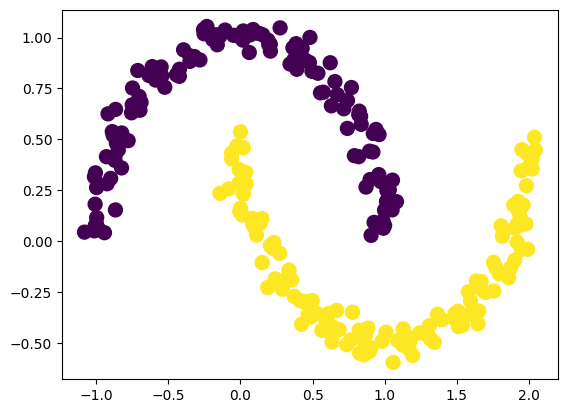

In [5]:
plt.scatter(x[:,0],x[:,1],c=y,s=100)
plt.show()

In [6]:
model = Sequential()
model.add(Dense(10,activation="sigmoid",input_dim=2))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                1

In [7]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=['accuracy'])

In [8]:
model.get_weights()[0]

array([[-0.6429465 ,  0.23329395,  0.04845637,  0.66959745, -0.29162264,
         0.6516437 , -0.46986133, -0.5225909 ,  0.6186641 ,  0.2815436 ],
       [-0.5671421 ,  0.4046387 , -0.19340545, -0.33443084, -0.3812909 ,
         0.22469497,  0.05719781, -0.6680734 ,  0.43282825, -0.32001865]],
      dtype=float32)

In [9]:
old_weight = model.get_weights()[0]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [11]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 5ms/step - loss: 0.7193 - accuracy: 0.5100
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7116 - accuracy: 0.5100
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7062 - accuracy: 0.5100
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7004 - accuracy: 0.5100
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.5100
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.5100
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5100
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 85/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 86/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 87/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 88/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 89/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 90/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 91/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 92/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 93/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 94/100
7/7 [===============

In [12]:
old_weight

array([[-0.6429465 ,  0.23329395,  0.04845637,  0.66959745, -0.29162264,
         0.6516437 , -0.46986133, -0.5225909 ,  0.6186641 ,  0.2815436 ],
       [-0.5671421 ,  0.4046387 , -0.19340545, -0.33443084, -0.3812909 ,
         0.22469497,  0.05719781, -0.6680734 ,  0.43282825, -0.32001865]],
      dtype=float32)

In [13]:
new_weight = model.get_weights()[0]

In [14]:
abs(100*(old_weight-new_weight)/old_weight)

array([[ 1.9561315 ,  8.641736  , 38.653526  ,  3.4067798 ,  4.8952136 ,
         3.880079  ,  2.3048942 ,  0.9898353 ,  0.97858644,  5.3909397 ],
       [ 1.9228663 ,  3.861256  ,  7.5241885 ,  6.775455  ,  2.8404799 ,
        10.345444  , 16.27854   ,  0.6620206 ,  1.2330526 ,  3.760154  ]],
      dtype=float32)

9600/9600 [==============================] - 24s 2ms/step


<Axes: >

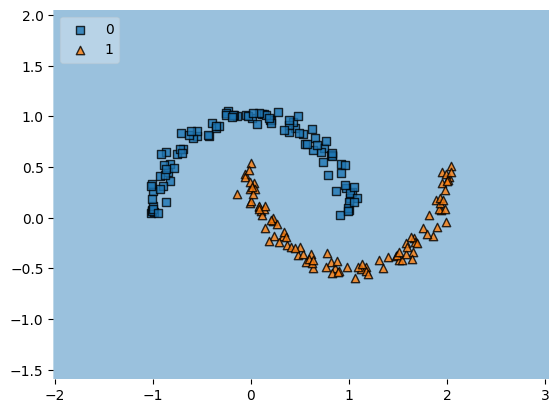

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.astype('int'),clf=model,legend=2)

## reduce complacity of model vanishing_gredient_problem

In [16]:
x,y = make_moons(n_samples=250,noise=0.05,random_state=42)

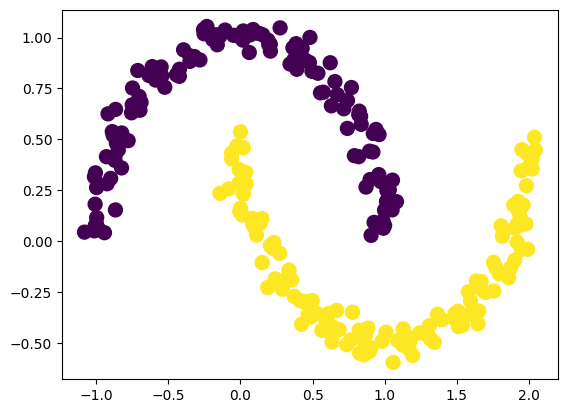

In [17]:
plt.scatter(x[:,0],x[:,1],c=y,s=100)
plt.show()

In [18]:
model = Sequential()
model.add(Dense(10,activation="sigmoid",input_dim=2))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                30        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=['accuracy'])

In [20]:
old_weights = model.get_weights()[0]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [22]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 0.7662 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7533 - accuracy: 0.4900
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7413 - accuracy: 0.4900
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7320 - accuracy: 0.4900
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7242 - accuracy: 0.4900
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7173 - accuracy: 0.4900
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7126 - accuracy: 0.4900
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7077 - accuracy: 0.4900
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7043 - accuracy: 0.4900
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7024 - accuracy: 0.4900
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 4ms/step - loss: 0.6100 - accuracy: 0.7900
Epoch 85/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.7900
Epoch 86/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5981 - accuracy: 0.7900
Epoch 87/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5916 - accuracy: 0.8000
Epoch 88/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5850 - accuracy: 0.7900
Epoch 89/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.7900
Epoch 90/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5717 - accuracy: 0.7900
Epoch 91/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7900
Epoch 92/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.8000
Epoch 93/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5507 - accuracy: 0.8000
Epoch 94/100
7/7 [===============

In [23]:
new_weights = model.get_weights()[0]

In [24]:
abs(100*(old_weights-new_weights)/old_weights)

array([[  93.71532 ,  122.89448 ,  156.90875 ,  536.6945  ,  113.055016,
         897.82086 ,  216.30727 , 1117.3716  ,  575.60236 ,  496.4011  ],
       [   9.247203,  281.35852 ,  159.27881 ,  185.59201 ,  285.3827  ,
         233.71046 , 1018.7385  ,  487.90405 ,  331.74466 ,  146.57152 ]],
      dtype=float32)

9600/9600 [==============================] - 22s 2ms/step


<Axes: >

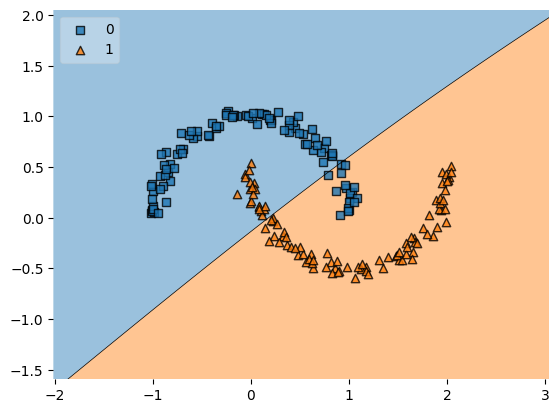

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.astype('int'),clf=model,legend=2)

#  relu Solve ---- vanishing_gredient_problem

In [26]:
x,y = make_moons(n_samples=250,noise=0.05,random_state=42)

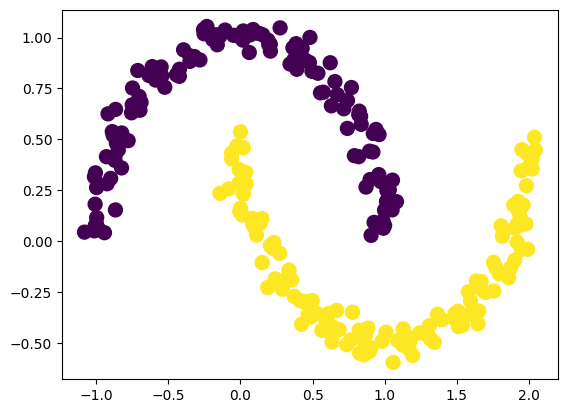

In [27]:
plt.scatter(x[:,0],x[:,1],c=y,s=100)
plt.show()

In [28]:
model = Sequential()
model.add(Dense(10,activation="relu",input_dim=2))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                30        
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 10)               

In [29]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=['accuracy'])

In [30]:
old_weights = model.get_weights()[0]

In [31]:
old_weights

array([[ 2.72515118e-01,  4.64852035e-01, -6.56503439e-01,
        -4.17059422e-01,  8.33698511e-02, -1.03354454e-04,
        -1.98411942e-02, -2.97865778e-01, -6.86487019e-01,
         3.41610134e-01],
       [ 6.68731749e-01,  1.56733334e-01, -4.94255573e-01,
        -6.29297256e-01,  1.62245154e-01,  3.99333298e-01,
        -2.08489001e-01, -2.63344646e-01,  4.60133612e-01,
         2.58564353e-02]], dtype=float32)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [33]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 5ms/step - loss: 0.6973 - accuracy: 0.4750
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.5900
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6891 - accuracy: 0.7750
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6858 - accuracy: 0.7450
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.7350
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.7450
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6592 - accuracy: 0.7950
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6411 - accuracy: 0.8450
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6185 - accuracy: 0.8500
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5903 - accuracy: 0.8800
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 4ms/step - loss: 4.2484e-04 - accuracy: 1.0000
Epoch 84/100
7/7 [==============================] - 0s 4ms/step - loss: 4.1097e-04 - accuracy: 1.0000
Epoch 85/100
7/7 [==============================] - 0s 4ms/step - loss: 3.9772e-04 - accuracy: 1.0000
Epoch 86/100
7/7 [==============================] - 0s 4ms/step - loss: 3.8536e-04 - accuracy: 1.0000
Epoch 87/100
7/7 [==============================] - 0s 4ms/step - loss: 3.7266e-04 - accuracy: 1.0000
Epoch 88/100
7/7 [==============================] - 0s 4ms/step - loss: 3.6264e-04 - accuracy: 1.0000
Epoch 89/100
7/7 [==============================] - 0s 4ms/step - loss: 3.5457e-04 - accuracy: 1.0000
Epoch 90/100
7/7 [==============================] - 0s 4ms/step - loss: 3.4330e-04 - accuracy: 1.0000
Epoch 91/100
7/7 [==============================] - 0s 4ms/step - loss: 3.3180e-04 - accuracy: 1.0000
Epoch 92/100
7/7 [==============================] - 0s 4ms/step - loss: 3.2340e-04 - accuracy: 

In [34]:
new_weights = model.get_weights()[0]

In [35]:
new_weights

array([[ 0.21779847,  0.60468566, -0.6606288 , -0.31116292,  0.06108992,
        -0.02869148, -0.0081213 , -0.3710391 , -0.79486907,  0.40403458],
       [ 0.71520644,  0.08861958, -0.48924863, -0.6775431 ,  0.20387326,
         0.31683075, -0.2371739 , -0.14747845,  0.45898533,  0.03208129]],
      dtype=float32)

In [36]:
abs(100*(old_weights-new_weights)/old_weights)

array([[2.00783882e+01, 3.00813198e+01, 6.28383100e-01, 2.53912258e+01,
        2.67242050e+01, 2.76602695e+04, 5.90684738e+01, 2.45658684e+01,
        1.57879229e+01, 1.82735939e+01],
       [6.94967699e+00, 4.34583702e+01, 1.01302636e+00, 7.66662312e+00,
        2.56575356e+01, 2.06600723e+01, 1.37584715e+01, 4.39979324e+01,
        2.49554351e-01, 2.40747013e+01]], dtype=float32)

9600/9600 [==============================] - 24s 2ms/step


<Axes: >

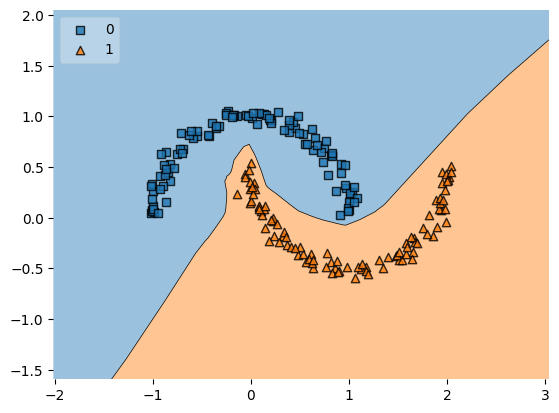

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.astype('int'),clf=model,legend=2)

# proper weight initialization Splution to solve vanishing gredient problem

In [38]:
# Clonoot and Xavier for tanh
# he for Relu

In [39]:
x,y = make_moons(n_samples=250,noise=0.05,random_state=42)

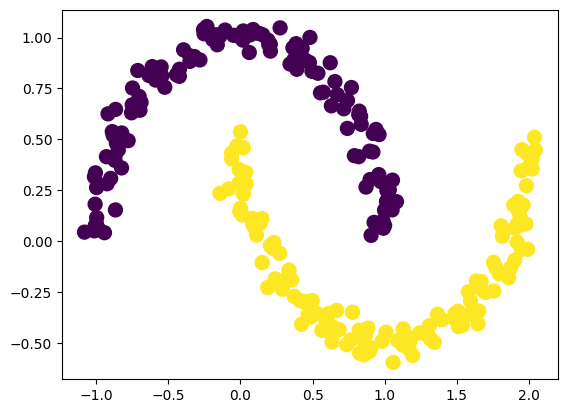

In [40]:
plt.scatter(x[:,0],x[:,1],c=y,s=100)
plt.show()

In [41]:
model = Sequential()
model.add(Dense(10,activation="relu",input_dim=2,kernel_initializer="he_normal"))
model.add(Dense(10,activation="relu",kernel_initializer="he_normal"))
model.add(Dense(10,activation="relu",kernel_initializer="he_normal"))
model.add(Dense(10,activation="relu",kernel_initializer="he_normal"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                30        
                                                                 
 dense_30 (Dense)            (None, 10)                110       
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [42]:
old_weights = model.get_weights()[0]

In [43]:
old_weights

array([[-0.50388545, -0.5688741 , -0.8858516 ,  0.577276  , -1.3564475 ,
        -0.05201666,  1.7505723 , -0.6447237 ,  0.51554954,  1.8639072 ],
       [ 1.2478813 , -0.06367695,  1.1181028 , -0.28323367, -0.8372772 ,
        -0.45498398,  0.01344498, -0.6876104 ,  0.80487525, -0.5326646 ]],
      dtype=float32)

In [44]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [46]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=['accuracy'])

In [47]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 1.4105 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 1.2555 - accuracy: 0.4900
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 1.1321 - accuracy: 0.4900
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 1.0241 - accuracy: 0.4800
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.9340 - accuracy: 0.4750
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8640 - accuracy: 0.4600
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8113 - accuracy: 0.4600
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7673 - accuracy: 0.4550
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7293 - accuracy: 0.4250
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6985 - accuracy: 0.4150
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 4ms/step - loss: 0.0977 - accuracy: 0.9700
Epoch 85/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0936 - accuracy: 0.9750
Epoch 86/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0920 - accuracy: 0.9700
Epoch 87/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.9800
Epoch 88/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0841 - accuracy: 0.9750
Epoch 89/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0813 - accuracy: 0.9800
Epoch 90/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0786 - accuracy: 0.9800
Epoch 91/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0760 - accuracy: 0.9800
Epoch 92/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0737 - accuracy: 0.9800
Epoch 93/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0710 - accuracy: 0.9800
Epoch 94/100
7/7 [===============

In [48]:
new_weights = model.get_weights()[0]

In [49]:
new_weights

array([[-0.41430312, -0.6415956 , -0.84364325,  0.5709295 , -1.3721794 ,
        -0.21651343,  1.6437494 , -0.65035367,  0.6380144 ,  1.7950749 ],
       [ 1.216978  ,  0.08915181,  1.1312311 , -0.48585007, -0.7813672 ,
        -0.33644283, -0.08393279, -0.6672118 ,  1.1361974 , -0.89097464]],
      dtype=float32)

In [50]:
abs(100*(old_weights-new_weights)/old_weights)

array([[ 17.778313 ,  12.783404 ,   4.764723 ,   1.0993813,   1.1597892,
        316.2386   ,   6.102174 ,   0.8732356,  23.754232 ,   3.6929026],
       [  2.4764647, 240.00638  ,   1.1741569,  71.53683  ,   6.6775966,
         26.053919 , 724.2684   ,   2.9665952,  41.164413 ,  67.26748  ]],
      dtype=float32)

9600/9600 [==============================] - 22s 2ms/step


<Axes: >

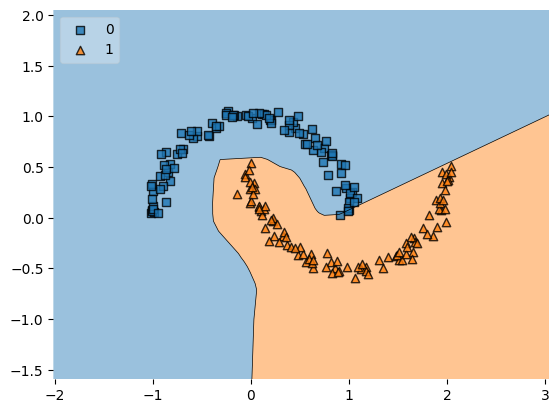

In [51]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.astype('int'),clf=model,legend=2)